# Punto 1
## Punto 9 capítulo 3
9) (a) Produce a scatterplot matrix which includes all of the variables in the data set.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from scipy import stats 
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf

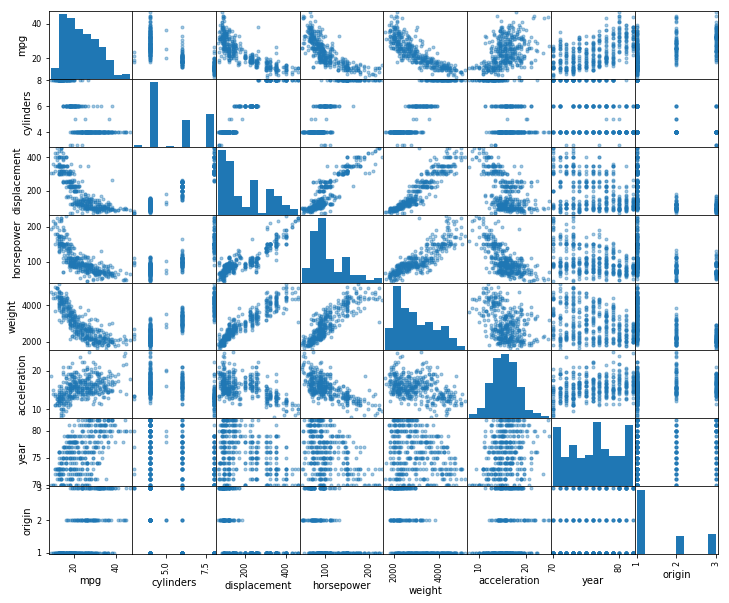

In [8]:
#Importo base
auto=pd.read_csv("C:\\Users\\Iván\\Desktop\\Mineria\\Taller\\Taller 2\\Bases/Auto.csv",na_values=["?"])
auto.dropna()
#Grafico Scatter Matrix
scatter_matrix(auto,alpha=0.4,diagonal='hist',figsize=(12,10))
plt.show()



(b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, cor() which is qualitative.

In [3]:
pd.DataFrame.corr(auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


(c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results.
<p>Comment on the output. </p>
<p>For instance:</p>
<p>i. Is there a relationship between the predictors and the response?</p>
<p>ii. Which predictors appear to have a statistically significant
relationship to the response? </p>
<p>iii. What does the coefficient for the year variable suggest?</p>



In [13]:
y=auto[[0]]
x=auto.iloc[:,1:8]
x= sm.add_constant(x)
#sm.OLS?
result=sm.OLS(y,x, missing="drop")
result=result.fit()
#result.params
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.818    
Dependent Variable: mpg              AIC:                2062.9495
Date:               2017-03-08 14:20 BIC:                2094.7196
No. Observations:   392              Log-Likelihood:     -1023.5  
Df Model:           7                F-statistic:        252.4    
Df Residuals:       384              Prob (F-statistic): 2.04e-139
R-squared:          0.821            Scale:              11.073   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
const            -17.2184   4.6443 -3.7074 0.0002 -26.3499 -8.0870
cylinders         -0.4934   0.3233 -1.5261 0.1278  -1.1290  0.1422
displacement       0.0199   0.0075  2.6474 0.0084   0.0051  0.0347
horsepower        -0.0170   0.0138 -1.2295 0.2196  -0.0441  0.0102
weight            -0.0065   0.0007 -9.9288 0.0000  -0.0078 -0.0052
acceleration       0.0806   0.0988  0.8152 0.4155  -0.1138  0.2749
year               0.7508   0.0510 14.7288 0.0000   0.6506  0.8510
origin             1.4261   0.2781  5.1275 0.0000   0.8793  1.9730
------------------------------------------------------------------
Omnibus:               31.906       Durbin-Watson:          1.309 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       53.100
Skew:                  0.529        Prob(JB):               0.000 
Kurtosis:              4.460        Condition No.:          85850 
==================================================================
* The condition number is large (9e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [10]:
result_1 = smf.ols('mpg ~ cylinders +displacement + horsepower +weight +acceleration + year + origin', auto).fit()
result_1.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,-17.2184,4.644,-3.707,0.000,-26.350 -8.087
cylinders,-0.4934,0.323,-1.526,0.128,-1.129 0.142
displacement,0.0199,0.008,2.647,0.008,0.005 0.035
horsepower,-0.0170,0.014,-1.230,0.220,-0.044 0.010
weight,-0.0065,0.001,-9.929,0.000,-0.008 -0.005
acceleration,0.0806,0.099,0.815,0.415,-0.114 0.275
year,0.7508,0.051,14.729,0.000,0.651 0.851
origin,1.4261,0.278,5.127,0.000,0.879 1.973


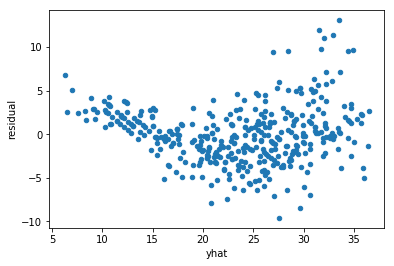

In [35]:
auto["yhat"]=result_1.fittedvalues
auto["residual"]=result_1.resid

auto.plot.scatter(x="yhat",y="residual")
plt.title("Residuals vs Fitted")
plt.subplot
plt.show()


In [37]:
plt.scatter(auto["yhat"],auto["residual"])
plt.show()

TypeError: polyfit() missing 1 required positional argument: 'deg'


(d) Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?
(e) Use the * and : symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?
(f) Try a few different transformations of the variables, such as
log(X), √X, X2. Comment on your findings.

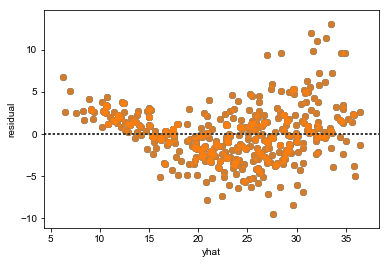

In [39]:
import seaborn as sns
sns.residplot(auto["yhat"],auto["residual"], data=auto)
plt.show()